In [47]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from datetime import datetime, timedelta
import re
import seaborn as sns
import sys
import plotly.express as px

import modules.read_csv as rc
import modules.trans_date as tdt
import modules.chart as cht
import modules.useless_coupon as uc

In [16]:
# Get the dataframe
df = rc.readfunc('../eda-proj-fc-purchase.csv')
# '거래일자' str -> datetime
df['거래일자'] = df['거래일자'].apply(tdt.trans_date)
# 'string numbers to int and repalce - to 0 or ''
df['쿠폰할인액'] = df['쿠폰할인액'].replace('-',0)
df['쿠폰이름'] = df['쿠폰이름'].replace('-','')
df['쿠폰할인액'] = df['쿠폰할인액'].astype(int)
df['판매가격'] = df['판매가격'].replace('-',0)
df['판매가격'] = df['판매가격'].astype(int)
#df = df.set_index('거래일자').sort_index()

In [17]:
# 필요없는 쿠폰 제거 - 테스트, 검수용, 내부직원용 등 1860개
before_df = len(df)
us_df = uc.useless_coupon(df)
useless_coupon_list = (us_df['coupon_name']).tolist()
df = df[~df['쿠폰이름'].isin(useless_coupon_list)]
print(before_df - len(df))

1860


In [18]:
rc.korean_apple()

In [19]:
df

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,,189000,TRANSFER,159000,0,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,,501000,TRANSFER,501000,0,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,,549000,CARD,549000,0,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,,239000,CARD,239000,0,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,,385000,CARD,385000,0,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,,289000,VBANK,289000,0,289000,-


# 인기 강의와 용담 강사님의 차이가 뭘까?
    - 용담강사님과 인기강의가 뭐가 다른지 그래프로 시각화하여 비교해보자

# 재구매 고객
    - 데이터 사이언스는 재구매 고객들이 얼마나 많이올까?
    - 재구매 고객들과 판매량의 상관관계
    - 월별 재구매고객들의 수
    - 쿠폰과의 상관관계
    
# 쿠폰의 상관관계
    - 뭐가 제일 좋은 쿠폰이었을가? → 사용하기 쉬운 쿠폰이나 타이밍이 맞는 쿠폰이 제일 좋다.
    - 쿠폰 사용 월 → 월이 쿠폰에 미치는 효과
    - 쿠폰 사용 빈도 → 한번 이상 사용된 쿠폰이 다른 쿠폰보다 더 효과적
    - 쿠폰 사용 고객의 구매 패턴 → 쿠폰을 많이 사용한 고객이 안사용한 고객보다 더 많은 강의를 구매한다던지
    

In [20]:
# target teacher lecture and tp5 lecture 
yongdam_list = ['초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능','올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화','올인원 패키지 : 머신러닝 서비스 구축을 위한 실전 MLOps','초격차 패키지 : 한 번에 끝내는 컴퓨터비전','초격차 패키지 : 데이터 엔지니어링','초격차 패키지 : 한 번에 끝내는 데이터 사이언스','초격차 패키지 : 한 번에 끝내는 데이터 분석 툴']
onlyyongdamlist = ['초격차 패키지 : 한 번에 끝내는 데이터 사이언스','초격차 패키지 : 한 번에 끝내는 데이터 분석 툴']
top5_datalist = ['초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능','올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화','올인원 패키지 : 머신러닝 서비스 구축을 위한 실전 MLOps','초격차 패키지 : 한 번에 끝내는 컴퓨터비전','초격차 패키지 : 데이터 엔지니어링']

In [21]:

# delete the columns you don't use
drop_list = ['거래id', '결제수단', '거래금액','환불금액','사이트']
result_df = df.drop(drop_list, axis=1)

In [22]:
# create the columns
# 재구매고객 : 고객 id의 갯수
result_df['재고객구매횟수'] = result_df.groupby('고객id')['고객id'].transform('size')
# 매출액 : 실거래금액의 총합
result_df['매출액'] = result_df.groupby('코스ID')['실거래금액'].cumsum()
# 강의별 구매인원 컬럼을 만들고 싶다.
## 먼저 컬럼을 줄인다.
dict_df = result_df.loc[:,['코스ID','유형','포맷','카테고리','코스(상품) 이름', '매출액']]
# 구매 유형에서 코스를 산 사람을 더한다.
df_payment = dict_df.groupby('코스ID')['유형'].apply(lambda x: (x == 'PAYMENT').sum())
# 코스를 기준으로 두 컬럼을 합친다.
new_df = dict_df.drop_duplicates(subset=['코스ID']).sort_values(by='매출액', ascending=False)
new_df = pd.merge(new_df, df_payment, on='코스ID')
new_df.rename(columns={'유형_x' : '유형'}, inplace=True)
new_df.rename(columns={'유형_y' : '구매수'}, inplace=True)
# 합치기 전에 쓸모없는 컬럼들을 삭제한다.
new_df = new_df.drop(['유형','포맷','카테고리','코스(상품) 이름'],axis=1)
dict_sales={}
dict_person={}
# 구매수가 담긴 코스 이름 데이터 프레임을 만든다.
for i in new_df['코스ID']:
    dict_person[i] = int(new_df[new_df['코스ID'] == i]['구매수'])

/var/folders/cq/lmpn6x5j7nj4jjfsmcksrsdc0000gn/T/ipykernel_63205/1882251821.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  dict_person[i] = int(new_df[new_df['코스ID'] == i]['구매수'])


In [23]:
# 어떤 강의가 패캠에서 사용유저들이 제일 많은가
## 매출액과 고객 구매횟수 구하기
# 구매수를 넣는다.
result_df['구매수'] = result_df['코스ID'].map(dict_person)
# 월별로 현재 구입한 숫자를 나타낸다.
result_df['현재구매수'] = result_df.groupby(['거래일자', '코스ID'])['코스ID'].transform('count')
# 쿠폰 할인액이 있으면 카운트 1, 아니면 0
result_df['쿠폰사용유무'] = np.where(result_df['쿠폰할인액'] != 0, 1, 0)
result_df = result_df.sort_values(by='거래일자')
# 현재 구입한 숫자들을 다 더한 것
cumulative_count = result_df.groupby('코스ID')['현재구매수'].cumsum()
cumulative_sales = result_df.groupby('코스ID')['실거래금액'].cumsum()
cumulative_coupon = result_df.groupby('코스ID')['쿠폰사용유무'].cumsum()
# 쿠폰 할인율
percent_coupon = (result_df['쿠폰할인액'] / result_df['판매가격']).round(4) * 100
# 누적 구매수, 누적 매출, 누적 사용
result_df['누적구매수'] = cumulative_count
result_df['누적매출액'] = cumulative_sales
result_df['쿠폰할인율'] = percent_coupon
result_df['쿠폰누적사용횟수'] = cumulative_coupon
# 쿠폰별 사용갯수 및 누적 사용갯수
result_df['쿠폰별사용갯수'] = result_df.groupby(['거래일자', '쿠폰이름'])['쿠폰이름'].transform('size')
cumulative_coupon_count = result_df.groupby('쿠폰이름')['쿠폰별사용갯수'].cumsum()
result_df['쿠폰별누적사용갯수'] = cumulative_coupon_count


In [24]:
# 월별 쿠폰, 코스, 매출
df_monthly_sales = result_df.groupby(result_df['거래일자'].dt.to_period('M'))['실거래금액'].sum().reset_index()
result_df_month = result_df
result_df_month['월별'] = pd.to_datetime(result_df['거래일자']).dt.strftime('%Y-%m')
df_month_cate = result_df_month.groupby(['월별', '카테고리'])['구매수'].sum().reset_index()
df_month_course = result_df_month.groupby(['월별', '코스(상품) 이름'])['구매수'].sum().reset_index()
df_month_coupon = result_df_month.groupby(['월별'])['쿠폰사용유무'].sum().reset_index()
#result_df_month
df_month_coupon


,월별,쿠폰사용유무
0,2022-01,9091
1,2022-02,5909
2,2022-03,5185
3,2022-04,3940
4,2022-05,5431
5,2022-06,4708
6,2022-07,6922
7,2022-08,6925
8,2022-09,5939
9,2022-10,7486


In [33]:

def chart_sales(df, columns):
    '''
    그래프 그려주는 함수
    parameters:
    df(dataframe): 현재 진행가능한 데이터프레임을 넣는다. 단, 거래일자로 sort가 되어 있어야한다.
    columns(str) : 비교하고자 하는 컬럼을 넣는다. 
    '''
    for course in df['코스(상품) 이름'].unique():
        plt.plot(df[df['코스(상품) 이름']==course]['거래일자'],df[df['코스(상품) 이름']==course][columns],label=course)
    plt.title(columns+' 비교')
    plt.ylabel(columns)
    plt.xlabel('거래일자')
    plt.legend(loc='best')
    plt.show()

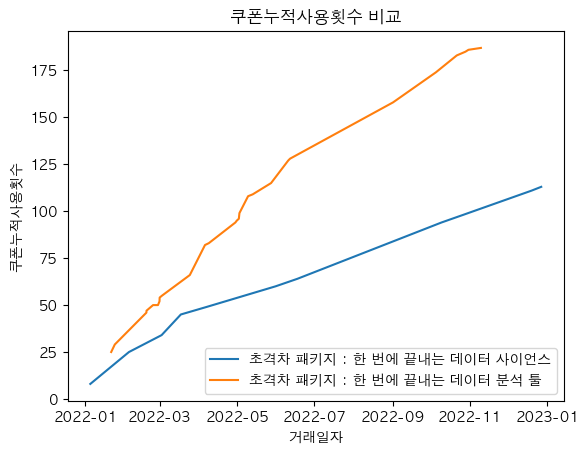

In [34]:
yongdam_df = result_df[(result_df['재고객구매횟수'] > 4) & (result_df['코스(상품) 이름'].isin(onlyyongdamlist))]
#test
chart_sales(yongdam_df, '쿠폰누적사용횟수')

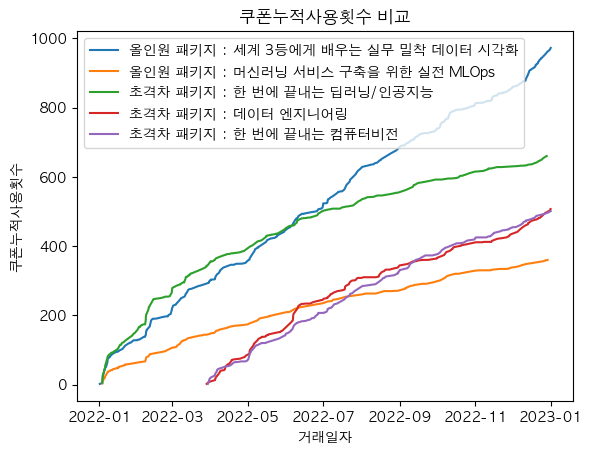

In [35]:
test = result_df[(result_df['재고객구매횟수'] >= 4) & (result_df['코스(상품) 이름'].isin(top5_datalist))]
chart_sales(test, '쿠폰누적사용횟수')

In [36]:
result_df[result_df['고객id'] == 69262]

,유형,고객id,코스ID,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,실거래금액,...,구매수,현재구매수,쿠폰사용유무,누적구매수,누적매출액,쿠폰할인율,쿠폰누적사용횟수,쿠폰별사용갯수,쿠폰별누적사용갯수,월별
158516,PAYMENT,69262,206356,올인원,데이터 사이언스,올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화,2022-01-03 10:01:15,[프로모션] 12월 1+1 수강권 이벤트,178000,0,...,1819,2,1,11,1007000,117.98,9,4,671,2022-01
88014,PAYMENT,69262,203525,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,2022-06-22 03:06:21,,235000,235000,...,2096,1,0,1401,201627274,0.00,666,1,53612,2022-06
64506,PAYMENT,69262,205949,올인원,프로그래밍,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,2022-08-14 11:08:21,,195000,195000,...,1204,1,0,1000,116051673,0.00,505,1,71998,2022-08
10739,PAYMENT,69262,211727,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 퀀트(금융공학) 실무,2022-12-11 19:12:40,,271000,271000,...,949,1,0,942,169916298,0.00,455,3,110251,2022-12


In [43]:
# 이상치 제거
grouped_df = test.groupby(pd.Grouper(key='거래일자', freq='M')).agg({'판매가격': 'mean', '유형': 'unique'}).reset_index()

#grouped_df = test.groupby(pd.Grouper(key='거래일자', freq='M')).sum()
grouped_df['zscore'] = (grouped_df['판매가격'] - grouped_df['판매가격'].mean()) / grouped_df['판매가격'].std()
threshold = 3
grouped_df_filtered = grouped_df[grouped_df['zscore'].abs() <= threshold]
grouped_df_filtered= grouped_df_filtered.sort_values('거래일자')

grouped_df_filtered


,거래일자,판매가격,유형,zscore
0,2022-01-31,246000.000000,"[PAYMENT, REFUND]",-1.451742
1,2022-02-28,241991.071429,"[PAYMENT, REFUND]",-1.633716
2,2022-03-31,259330.434783,"[PAYMENT, REFUND]",-0.846644
3,2022-04-30,271591.666667,"[PAYMENT, REFUND]",-0.290079
4,2022-05-31,273735.042735,"[PAYMENT, REFUND]",-0.192786
5,2022-06-30,266013.513514,"[PAYMENT, REFUND]",-0.543284
6,2022-07-31,294395.762712,"[PAYMENT, REFUND]",0.745050
7,2022-08-31,308417.674419,"[PAYMENT, REFUND]",1.381536
8,2022-09-30,291438.202247,"[PAYMENT, REFUND]",0.610800
9,2022-10-31,284040.404040,"[PAYMENT, REFUND]",0.274997


<Axes: xlabel='거래일자', ylabel='판매가격'>

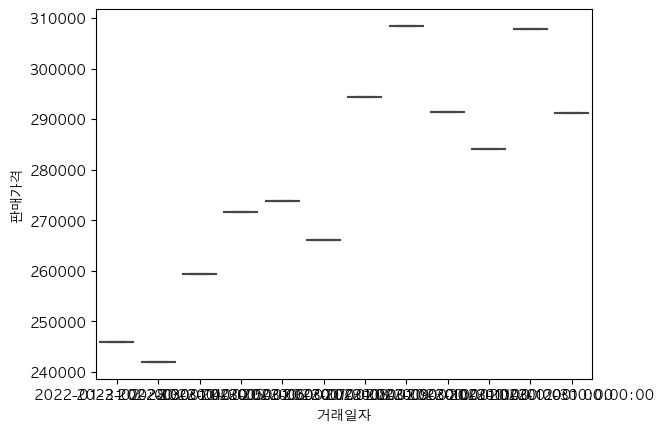

In [42]:
sns.boxplot(x='거래일자', y='판매가격', data=grouped_df_filtered)

In [44]:
test = result_df[(result_df['재고객구매횟수'] >= 4) & (result_df['코스(상품) 이름'].isin([top5_datalist[0]]))]
yongdam_df = result_df[(result_df['재고객구매횟수'] > 4) & (result_df['코스(상품) 이름'].isin([onlyyongdamlist[0]]))]


In [50]:
fig = px.line(df_month_coupon, x='월별', y='쿠폰사용유무')
fig.show()

In [51]:
welcome_df = result_df[(result_df['쿠폰이름'].str.contains('WELCOME')) & (result_df['쿠폰별사용갯수'] >= 2)]
welcome_df


,유형,고객id,코스ID,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,실거래금액,...,구매수,현재구매수,쿠폰사용유무,누적구매수,누적매출액,쿠폰할인율,쿠폰누적사용횟수,쿠폰별사용갯수,쿠폰별누적사용갯수,월별
156369,PAYMENT,20695,203720,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,2022-01-04 17:01:01,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,221000,171000,...,2461,1,1,99,7675700,22.62,63,2,115,2022-01
156331,PAYMENT,51667,203942,올인원,프로그래밍,초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,2022-01-04 17:01:01,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,215000,165000,...,903,1,1,44,4159000,23.26,33,2,117,2022-01
155685,PAYMENT,25922,203942,올인원,프로그래밍,초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,2022-01-05 11:01:46,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,215000,165000,...,903,1,1,53,4807000,23.26,42,2,154,2022-01
155728,PAYMENT,88385,205747,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 React의 모든 것,2022-01-05 11:01:46,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,232000,182000,...,1101,1,1,63,5248390,21.55,40,2,156,2022-01
155560,PAYMENT,39267,208856,올인원,프로그래밍,초격차 패키지 : 30개 프로젝트로 배우는 프론트엔드 with React,2022-01-05 14:01:19,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,209000,159000,...,1106,1,1,42,3316150,23.92,41,2,167,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,PAYMENT,54023,204670,RED,마케팅,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,2022-12-31 23:12:51,[WELCOME] The RED 3만원할인,198000,168000,...,996,1,1,1075,164305253,15.15,370,2,215,2022-12
38,PAYMENT,5002,211368,올인원,프로그래밍,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),2022-12-31 23:12:54,[WELCOME] 프로그래밍 3만원할인,203000,173000,...,2458,1,1,2800,310708058,14.78,1415,2,739,2022-12
46,PAYMENT,86904,203934,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편,2022-12-31 23:12:54,[WELCOME] 프로그래밍 3만원할인,157000,127000,...,1059,1,1,1167,107430424,19.11,415,2,741,2022-12
137,PAYMENT,64019,208856,올인원,프로그래밍,초격차 패키지 : 30개 프로젝트로 배우는 프론트엔드 with React,2022-12-31 23:12:55,[WELCOME] 프로그래밍 3만원할인,230000,200000,...,1106,1,1,1268,132070251,13.04,712,2,743,2022-12


In [52]:
fig = px.line(welcome_df, x='거래일자', y='쿠폰누적사용횟수')
fig.show()

In [53]:
new_df = result_df[(result_df['쿠폰이름'].str.contains('NEW')) & (result_df['쿠폰누적사용횟수'] >= 2)]
fig = px.line(new_df, x='거래일자', y='쿠폰별누적사용갯수')
fig.show()

In [54]:
prm_df = result_df[(result_df['쿠폰이름'].str.contains('프로모션')) & (result_df['쿠폰누적사용횟수'] >= 2)]
fig = px.line(prm_df, x='거래일자', y='쿠폰별누적사용갯수')
fig.show()

In [55]:
twen_df = result_df[(result_df['쿠폰이름'].str.contains('20%')) & (result_df['쿠폰별사용갯수'] >= 2)]
fig = px.line(prm_df, x='거래일자', y='쿠폰별누적사용갯수')
fig.show()

In [56]:

coupon_list = result_df.sort_values('쿠폰별사용갯수',ascending=False)['쿠폰이름'].unique()
top5_coupon = coupon_list[1:6]

<Axes: xlabel='월별거래일자', ylabel='카테고리'>

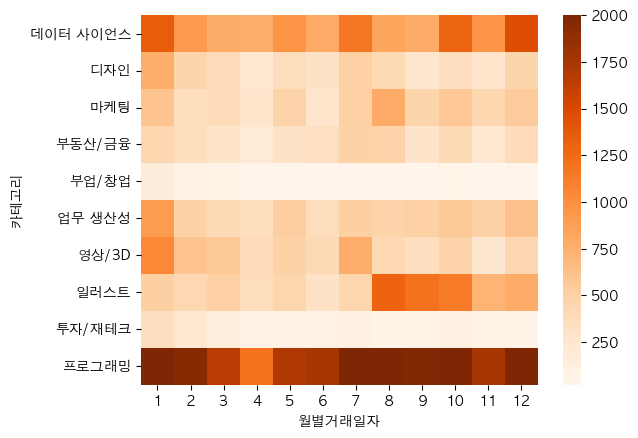

In [57]:
# 카테고리별 월 별 쿠폰 사용량
result_df['월별거래일자'] = pd.to_datetime(result_df['거래일자']).dt.month
df_pivot = pd.pivot_table(result_df,values='쿠폰사용유무', index='카테고리', columns='월별거래일자', aggfunc='sum')
sns.heatmap(df_pivot, annot=False, cmap='Oranges',vmax=2000)

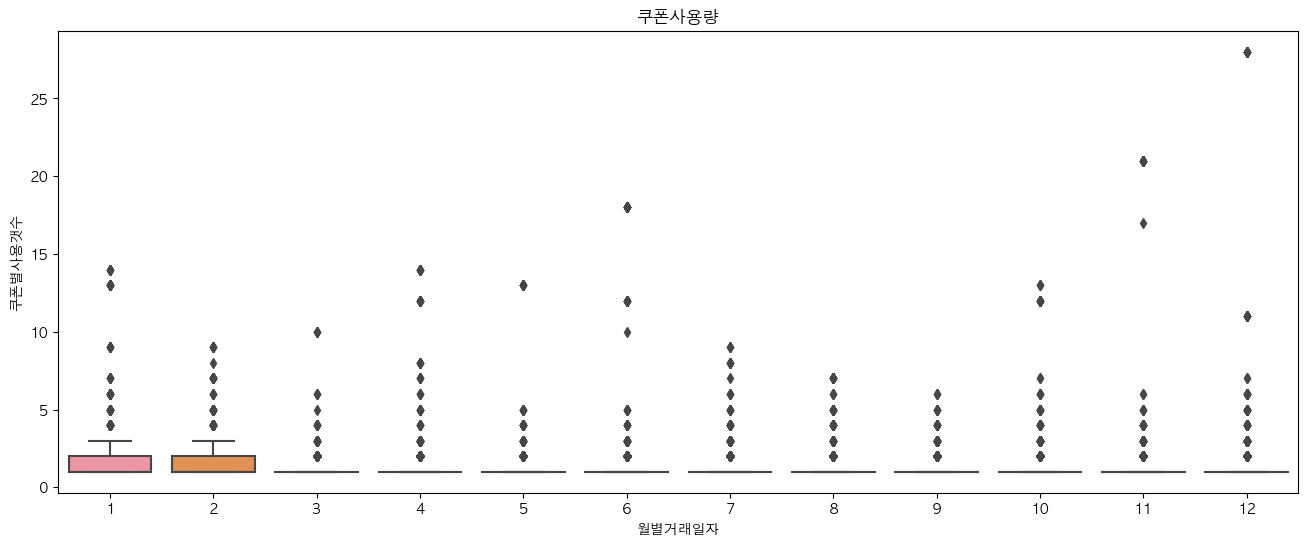

In [58]:
# 월별 쿠폰 사용량
plt.figure(figsize=(16,6))
sns.boxplot(x='월별거래일자',y='쿠폰별사용갯수', data=result_df[result_df['카테고리'] == '데이터 사이언스'])
plt.title('쿠폰사용량')
plt.show()

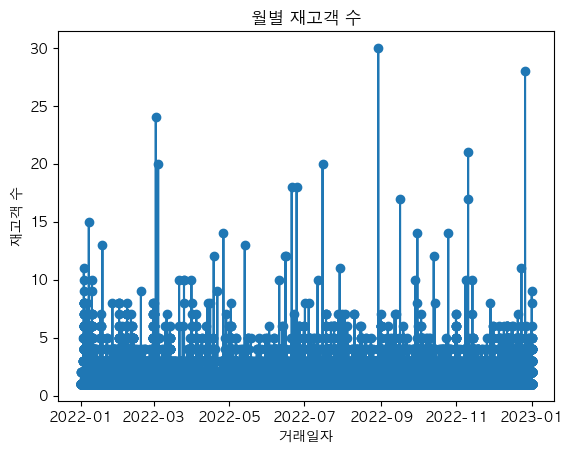

In [59]:
# 월별 재고객 구매수

df_funnel = result_df.groupby('거래일자')['고객id'].nunique().reset_index()
plt.plot(df_funnel['거래일자'], df_funnel['고객id'], marker='o')
plt.title('월별 재고객 수')
plt.xlabel('거래일자')
plt.ylabel('재고객 수')
plt.show()

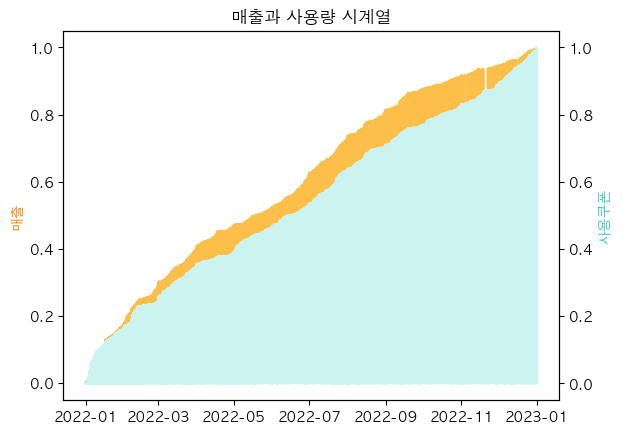

In [61]:
# 월별 매출 vs 쿠폰사용량

#result_df.set_index('거래일자', inplace=True)
max_revenue = result_df['누적매출액'].max()
max_coupon = result_df['쿠폰누적사용횟수'].max()

result_df['누적금액정규화'] = result_df['누적매출액'] / max_revenue
result_df['누적쿠폰정규화'] = result_df['쿠폰누적사용횟수'] / max_coupon

fig, ax1 = plt.subplots()

# 매출 
ax1.plot(result_df['거래일자'], result_df['누적금액정규화'], color='#fcbf49')
ax1.set_ylabel('매출', color = '#f77f00')

#사용량
ax2 = ax1.twinx()
ax2.plot(result_df['거래일자'], result_df['누적쿠폰정규화'], color='#cbf3f0')
ax2.set_ylabel('사용쿠폰', color='#2ec4b6')

plt.title('매출과 사용량 시계열')

plt.xlabel('date')
plt.show()

In [62]:
# 쿠폰 카테고리
coupon_cate = {}
cate_list = result_df['카테고리'].unique()
coupon_list_test = coupon_list.tolist()
check_list=coupon_list.tolist()
for i in check_list[1:]:
    count = 0
    
    if (('WELCOME' in i) and ('처음' in i)) or ('신규가입자' in i):
        coupon_cate[i] = 'new'
        count = 1
    elif ('[프로모션]' in i): 
        coupon_cate[i] = 'months'
        count = 1
    elif '증정' in i :
        coupon_cate[i] = 'gift'
        count =1
    elif ("월이니까" in i) or ('월 쿠폰' in i):
        coupon_cate[i] = 'months'
        count =1
    elif ('WELCOME' in i) and (any(cate in i  for cate in cate_list)):
        coupon_cate[i] = 'cate'
        count =1
    elif ("100%" in i) or ('1+1' in i) or ('무료' in i):
        coupon_cate[i] = '100'
        count = 1
    elif ('3만원' in i) or ('온라인 강의' in i) or ('할인쿠폰' in i) or \
        ('할인]' in i) or ('패스트캠퍼스'in i) or ('쿠폰]'in i) or ('시크릿' in i):
        #print('할인', i)
        count =1 
        coupon_cate[i] = 'timesale'
    else:
        count =0
        coupon_cate[i] = 'etc'
    if count == 1:
        coupon_list_test.remove(i)



 

In [63]:
result_df['쿠폰카테고리'] = result_df['쿠폰이름'].map(coupon_cate)
result_df

,유형,고객id,코스ID,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,실거래금액,...,누적매출액,쿠폰할인율,쿠폰누적사용횟수,쿠폰별사용갯수,쿠폰별누적사용갯수,월별,월별거래일자,누적금액정규화,누적쿠폰정규화,쿠폰카테고리
159323,PAYMENT,39658,204491,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,207000,...,207000,4.61,1,1,1,2022-01,1,0.000527,0.000671,timesale
159324,PAYMENT,95136,206811,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,,385000,385000,...,385000,0.00,0,1,1,2022-01,1,0.000979,0.000000,NaN
159319,PAYMENT,27994,205747,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 React의 모든 것,2022-01-01 00:01:18,,232000,232000,...,232000,0.00,0,1,2,2022-01,1,0.000590,0.000000,NaN
159313,PAYMENT,87475,206356,올인원,데이터 사이언스,올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화,2022-01-01 00:01:20,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,178000,168000,...,168000,5.62,1,1,2,2022-01,1,0.000427,0.000671,timesale
159325,PAYMENT,12764,202927,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,136000,...,136000,18.07,1,1,1,2022-01,1,0.000346,0.000671,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,PAYMENT,27296,214298,올인원,업무 생산성,올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터,2022-12-31 23:12:58,[2만원 할인] 랜선사수 피도리와 함께하는 생존 PPT 마스터,130000,110000,...,7170500,15.38,65,1,19,2022-12,12,0.018242,0.043624,timesale
5,PAYMENT,47039,210773,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:58,,239000,239000,...,126032877,0.00,568,2,119019,2022-12,12,0.320625,0.381208,NaN
161,PAYMENT,33067,203655,올인원,부동산/금융,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간...,2022-12-31 23:12:58,,868000,868000,...,133457070,0.00,1,2,119021,2022-12,12,0.339512,0.000671,NaN
146,PAYMENT,46636,213924,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 AWS 기반 아키텍처 설계와 DevOps,2022-12-31 23:12:59,"[120,000원 할인 쿠폰] [한 번에 끝내는 AWS 기반 아키텍처 설계와 Dev...",190000,70000,...,41118100,63.16,235,1,159,2022-12,12,0.104604,0.157718,timesale


Text(0.5, 1.0, '쿠폰 카테고리 별 카테고리로 보는 강의와 쿠폰 상관관계')

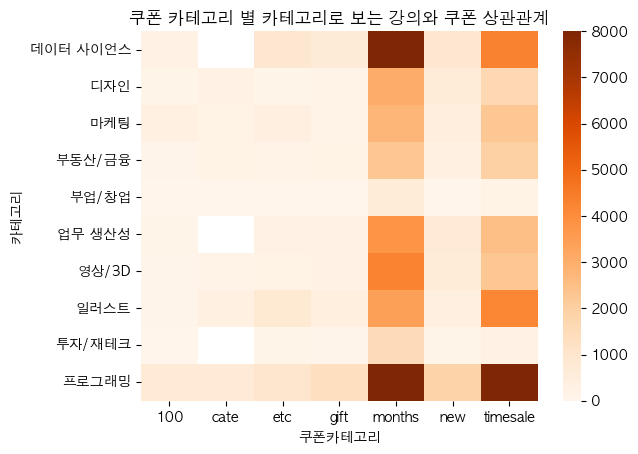

In [64]:
df_pivot = pd.pivot_table(result_df,values='쿠폰별사용갯수', index='카테고리', columns='쿠폰카테고리', aggfunc='sum')
sns.heatmap(df_pivot, annot=False, cmap='Oranges', vmin= 0, vmax=8000)
plt.title('쿠폰 카테고리 별 카테고리로 보는 강의와 쿠폰 상관관계')